In [ ]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving process_dataset_new.csv to process_dataset_new (1).csv


In [ ]:
df=pd.read_csv('process_dataset_new.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1977 non-null   int64  
 1   program_duration_days        1977 non-null   float64
 2   number_of_applications       1977 non-null   int64  
 3   number_of_interviews         1977 non-null   float64
 4   primary_track                1977 non-null   object 
 5   placed                       1977 non-null   int64  
 6   employment_status            1977 non-null   object 
 7   highest_level_of_education   1977 non-null   object 
 8   length_of_job_search         1977 non-null   object 
 9   biggest_challenge_in_search  1977 non-null   object 
 10  professional_experience      1977 non-null   object 
 11  work_authorization_status    1977 non-null   object 
 12  gender                       1977 non-null   object 
 13  race              

In [ ]:
df.head()

In [ ]:
df['placed']=df['placed'].astype(int)
df['program_duration_days']=df['program_duration_days'].astype(int)
df['number_of_interviews']=df['number_of_interviews'].astype(int)
df['number_of_applications']=df['number_of_applications'].astype(int)

In [ ]:
dummy_1=pd.get_dummies(df[['race','gender','work_authorization_status','professional_experience','biggest_challenge_in_search',
                        'highest_level_of_education','employment_status ','primary_track','length_of_job_search']])

In [ ]:
df = pd.concat([df, dummy_1], axis=1)

In [ ]:
df=df.drop(['race','gender','work_authorization_status','professional_experience','biggest_challenge_in_search','highest_level_of_education','employment_status ','primary_track','length_of_job_search'],axis=1)

In [ ]:
X=df.drop('placed',axis=1)
y=df['placed']

In [ ]:
from sklearn import preprocessing
transform=preprocessing.StandardScaler()
x_scaled=transform.fit_transform(X)

In [ ]:
df_x=pd.DataFrame(x_scaled,columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, 
                                                    y, test_size=0.20, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
parameters={'C':[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [ ]:
from sklearn.model_selection import GridSearchCV
logreg_cv=GridSearchCV(lr,parameters,cv=7)
logreg_cv.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [ ]:
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.5996235426323923


In [ ]:
accuracyy=[]
methods=[]
accuracyy.append(logreg_cv.score(X_test,y_test))
methods.append('logistic regression')
logreg_cv.score(X_test,y_test)

0.6035353535353535

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}
knn_cv=GridSearchCV(knn,parameters,cv=11)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=11, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [ ]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
0.5717886911068729


In [ ]:
accuracyy.append(knn_cv.score(X_test,y_test))
methods.append('KNN')
knn_cv.score(X_test,y_test)

0.5732323232323232

In [ ]:
from sklearn.svm import SVC
svm=SVC()

In [ ]:
parameters = {'C': [0.1, 1.5, 2.0],
            'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [ ]:
svm_cv=GridSearchCV(svm,parameters,cv=4)
svm_cv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 1.5, 2.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print('accuracy:',svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 2.0, 'kernel': 'rbf'}
accuracy: 0.6198679836338065


In [ ]:
accuracyy.append(svm_cv.score(X_test,y_test))
methods.append('SVM')
svm_cv.score(X_test,y_test)

0.6287878787878788

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
parameters = {'min_samples_leaf': [1, 2, 4],'splitter':['best','random'],
     'min_samples_split': [2, 5, 10],'max_depth':[2*n for n in range(1,10)],'criterion':['gini','entropy']}

In [ ]:
tree=DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters,cv=10)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print(tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
0.8001393201178251


In [ ]:
accuracyy.append(tree_cv.score(X_test,y_test))
methods.append('Decision Tree')
tree_cv.score(X_test,y_test)

0.7878787878787878

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
parameters = {'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],  'n_estimators': [10,20,30] }

In [ ]:
rfc_cv = GridSearchCV(rfc, parameters,cv=10)
rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print(rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 30}
0.730574795000398


In [ ]:
accuracyy.append(rfc_cv.score(X_test,y_test))
methods.append('Random Forest')
rfc_cv.score(X_test,y_test)

0.7373737373737373

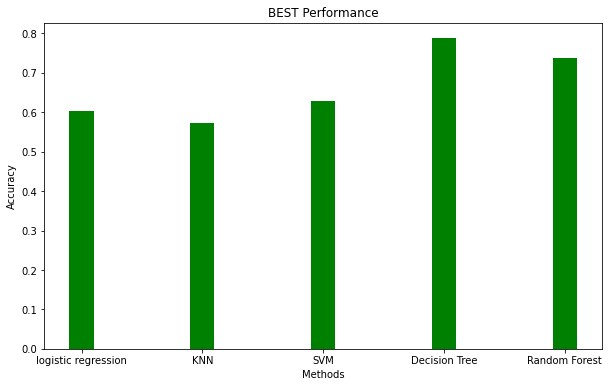

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,6))
plt.bar(methods,accuracyy,color='green',width=0.2)
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('BEST Performance')
plt.show()
